# Análise de Dados - UFPB

**Professor** : Marcus Carvalho

Aluno: Kawhan Laurindo de Lima

# Projeto final

Os dados utilizados são dados da eleição de 2020 que conta com várias informações da eleição municipal de toda paraiba, o objetivo é fazer uma analise para tentar identificar possíveis relações entre as variáveis e consequentemente aprimorar as analises.

## Carregamento dos dados

## Análise exploratória de dados

Inicialmente, faça uma análise exploratória das variáveis que você considerar mais importantes para a análise.

#### Headers in data

- `SQ_CANDIDATO` -> Número sequencial da candidata ou candidato, gerado
internamente pelos sistemas eleitorais para cada eleição. 
- `ANO_ELEICAO` -> Ano de referência da eleição para geração do arquivo.
- `SG_UF` -> Sigla da Unidade da Federação em que ocorreu a eleição.
- `DS_CARGO` -> Descrição do cargo da candidata ou candidato.
- `NR_CANDIDATO` -> Número da candidata ou candidato na urna
- `NM_URNA_CANDIDATO` -> Nome da candidata ou candidato que aparece na urna.
- `SG_PARTIDO` -> Sigla do partido de origem da candidata ou candidato.
- `DT_NASCIMENTO` -> Data de nascimento da candidata ou candidato.
- `NR_IDADE_DATA_POSSE` -> Idade da candidata ou candidato na data da posse.
- `DS_GENERO` -> Gênero da candidata ouo candidato.
- `DS_GRAU_INSTRUCAO` -> Grau de instrução da candidata ou candidato.
- `DS_ESTADO_CIVIL` -> Estado civil da candidata ou candidato.
- `DS_COR_RACA` -> Cor/raça da candidata ou candidato. (autodeclaração)
- `DS_OCUPACAO` -> Ocupação da candidata ou candidato.
- `VR_DESPESA_MAX_CAMPANHA` -> Valor máximo, em Reais, de despesas de campanha
declarada pelo partido para aquela candidata ou candidato.
- `DS_SIT_TOT_TURNO` -> Descrição da situação de totalização da candidata ou
candidato naquele turno.
- `QT_VOTOS` -> Quantidade total de votos do candidato
- `VR_RECEITA`-> Valor total arrecadado pelo candidato para gastar na campanha (R$)
- `VR_BEM_CANDIDATO` -> Valor total de todos os bens do candidato declarados para o TSE (R$)
- `NM_CANDIDATO` -> Nome completo declarado pelo candidato

In [1]:

# Imports
import pandas as pd
from scipy.stats import trim_mean
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [2]:
# Open the data csv 

eleicao = (
    pd.read_csv('dados/eleicao_2020_pb_prefeito.csv')
)


In [3]:
# Limpando os dados (retirando os nulos)

colunas_numericas = ['NR_IDADE_DATA_POSSE', 'VR_DESPESA_MAX_CAMPANHA', 'QT_VOTOS', 'VR_RECEITA', 'VR_BEM_CANDIDATO']

eleicao[colunas_numericas] = eleicao[colunas_numericas].fillna(0)

In [4]:

# Criando a coluna do percentual de cada candidato

total_votos_eleicao = eleicao['QT_VOTOS'].sum()
eleicao['PERCENTUAL_VOTOS'] = (eleicao['QT_VOTOS'] / total_votos_eleicao) * 100

### Distribuição do percentual de votos

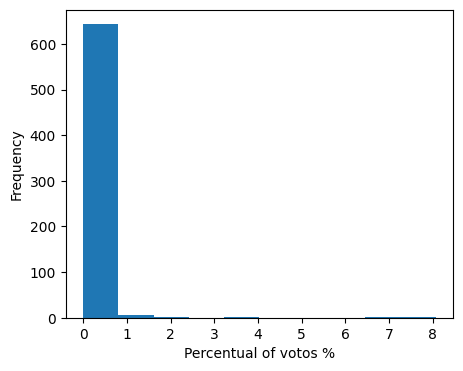

In [10]:
percentual = eleicao['PERCENTUAL_VOTOS']

binPop = pd.cut(percentual, 10)
binPop.value_counts()

ax = percentual.plot.hist(figsize=(5, 4))
ax = ax.set_xlabel('Percentual of votos %')

#### Explicação sobre o gráfico

Analisando a questão do percentual dos votos apresentados podemos notar que a grande frequencia do percentual ficou relacionado ao valor entre 0 e 1% (Lembrando que esse percentual) foi levantado em relação ao número de votos.

### Boxplot para identificar possíveis outliers no percentual

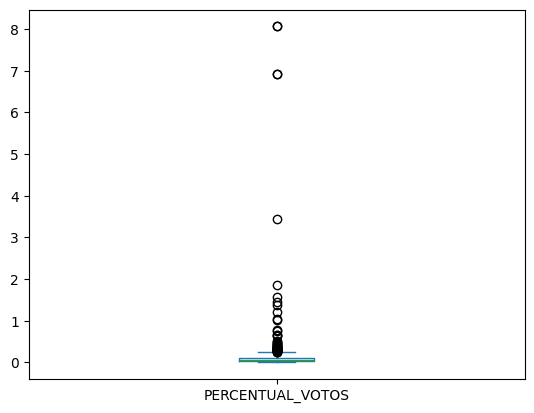

In [11]:
ax = percentual.plot.box()

#### Explicação sobre o gráfico (Boxplot)

O gráfico mostrou que quando analisamos o percentual dos votos há um grande número de outliers, isso claro pode impactar de diversas formas medidas de centralidade, por exemplo, temos a média que é impactada e muito pelo número de outliers.

### Medidas de centralidade 

In [13]:
print(f"Média aritmética = {percentual.mean()}")
print(f"Moda = {percentual.mode()[0]}")
print(f"Mediana = {percentual.median()}")
print(f"Média truncada = {trim_mean(percentual, 0.1)}")


percentual.describe()

Média aritmética = 0.15267175572519084
Moda = 0.0
Mediana = 0.06638181670266731
Média truncada = 0.07388629389592637


count    655.000000
mean       0.152672
std        0.614814
min        0.000000
25%        0.028860
50%        0.066382
75%        0.118163
max        8.063102
Name: PERCENTUAL_VOTOS, dtype: float64

#### Explicação sobre as médidas de centralidade:

A média é susceptível a ser influenciada por outliers, especialmente quando a amostra apresenta um número significativo desses valores atípicos em relação ao conjunto de dados. É provável que a presença de vários outliers destacados no boxplot tenha afetado a média. Por outro lado, a moda, embora seja mais robusta em relação a outliers, pode resultar na exclusão de algumas informações relevantes.

A discrepância significativa entre todas as medidas de centralidade pode ser atribuída à grande variação nos dados, particularmente devido à presença de muitos outliers. Essa variação pode distorcer as estimativas de tendência central e enfatiza a importância de uma análise cuidadosa para interpretar corretamente os dados.

O desvio padrão é uma medida de dispersão que indica o quão distante os valores médios estão da média. Essa alta variabilidade, como indicada pelo desvio padrão, sugere que os votos podem estar distribuídos de forma bastante espalhada em torno da média, com alguns valores podendo estar consideravelmente distantes da média de 0.152672 . Isso destaca a importância de considerar não apenas a média, mas também a dispersão dos dados ao analisar a distribuição dos votos.

Valores extremos:

Mínimo: O valor mínimo observado nos dados é  0.000000. Isso representa o ponto mais baixo na distribuição do percentual dos votos.

Primeiro quartil (Q1): O valor do primeiro quartil é  0.028860, o que significa que 25% dos percentuais dos votos estão abaixo desse valor.

Mediana (Q2): A mediana, ou segundo quartil, é 0.066382, como mencionado anteriormente.

Terceiro quartil (Q3): O valor do terceiro quartil é 0.118163, indicando que 75% dos percentuais estão abaixo desse valor.

Máximo: O valor máximo observado nos dados é 8.063102, representando o ponto mais alto na distribuição dos votos.

### Qual foi o candidato mais votado segundo o percentual?

In [17]:
# Pessoa que obteve mais votos
most_popular = percentual.max()
eleicao[percentual == most_popular]

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,...,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO,PERCENTUAL_VOTOS
262,150000976695,2020,PB,PREFEITO,11,CICERO LUCENA,PP,05/08/1957,63,MASCULINO,...,CASADO(A),PARDA,OUTROS,ELEITO,260665.0,2894067.98,1867828.46,1123357.13,CICERO DE LUCENA FILHO,8.063102
412,150000976695,2020,PB,PREFEITO,11,CICERO LUCENA,PP,05/08/1957,63,MASCULINO,...,CASADO(A),PARDA,OUTROS,2º TURNO,260665.0,2894067.98,1867828.46,2808392.83,CICERO DE LUCENA FILHO,8.063102


#### Explicação sobre a pessoa mais votada

Cicero Lucena como levantado é o candidato com maior percentual de votos, ele é empresário da construção civil, foi presidente do Sinduscon de João Pessoa. Sobrinho do político paraibano Humberto Lucena, iniciou sua carreira política em 1990 quando foi escolhido para concorrer como vice-governador do PMDB na chapa encabeçada por Ronaldo Cunha Lima. Essa chapa venceu a eleição em segundo turno. Em 1994, com o afastamento de Cunha Lima para candidatar-se ao Senado, Cícero Lucena assume o governo do estado para o restante do mandato. Com 37 anos de idade, tornou-se o governador mais jovem a assumir o governo da Paraíba.

Ele teve uma vida politica muito ativa, e já teve apoio de grandes políticos da época e isso impussionou sua carreira até os dias atuais, porém, ele passou por algumas turbulencias segue o texto:

Enquanto ocupava o cargo de secretário estadual de Planejamento da Paraíba, foi preso em 21 de julho de 2005 pela Polícia Federal, acusado de chefiar uma quadrilha que foi desmascarada pela Operação Confraria.

Em 2006, foi eleito senador com 803 600 votos (48,25% dos votos válidos), derrotando seu maior rival, o então senador e candidato à reeleição Ney Suassuna.

Em 2012, Cícero foi indicado pelo PSDB como candidato a prefeito de João Pessoa para a eleição municipal deste ano, onde conseguiu chegar ao 2° turno do pleito como o segundo candidato mais votado no 1° turno com 75 170 votos (20,27% dos votos válidos). No 2° turno, foi derrotado nas urnas pelo candidato Luciano Cartaxo do PT que obteve 246 581 votos (68,13% dos votos válidos) contra seus 115 369 votos (31,87% dos votos válidos).

Em 2020, foi novamente eleito prefeito de João Pessoa, obtendo 53,16% dos votos e vencendo o candidato Nilvan Fereira (MDB) no segundo turno.

Link de onde foi retirado as informações: https://pt.wikipedia.org/wiki/C%C3%ADcero_Lucena

João Pessoa é o município mais populoso da Paraíba, isso pode ter ocasionado no grande percentual de votos associados ao candidato.

### Qual foi o candidato menos votado?

In [18]:
less_popular = percentual.min()
eleicao[percentual == less_popular]

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,...,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO,PERCENTUAL_VOTOS
3,150001201835,2020,PB,PREFEITO,40,IVAN SOUSA,PSB,25/02/1958,62,MASCULINO,...,CASADO(A),PARDA,AGRICULTOR,NÃO ELEITO,0.0,0.0,50000.0,123077.42,IVAN LUIS DE SOUSA,0.0
123,150000802795,2020,PB,PREFEITO,19,EMMANUEL,PODE,10/04/1977,43,MASCULINO,...,CASADO(A),BRANCA,COMERCIANTE,#NULO#,0.0,0.0,270000.0,123077.42,WILMESON EMMANUEL MENDES SARMENTO,0.0
232,150000653131,2020,PB,PREFEITO,15,EDGARD GAMA,MDB,04/06/1958,62,MASCULINO,...,CASADO(A),PARDA,EMPRESÁRIO,#NULO#,0.0,0.0,22896.0,261882.96,EDGARD GAMA,0.0
293,150001063465,2020,PB,PREFEITO,19,MENUDO IRMÃO ADERALDO,PODE,14/10/1971,49,MASCULINO,...,CASADO(A),PRETA,PRODUTOR AGROPECUÁRIO,#NULO#,0.0,0.0,800000.0,238580.64,ADERALDO FERREIRA DOS SANTOS,0.0
347,150001093869,2020,PB,PREFEITO,25,RENATO,DEM,07/02/1978,42,MASCULINO,...,CASADO(A),BRANCA,ADMINISTRADOR,#NULO#,0.0,130000.0,208000.0,197393.92,RENATO MENDES LEITE,0.0
468,150001029107,2020,PB,PREFEITO,11,DR. MARINHO,PP,25/01/1947,73,MASCULINO,...,DIVORCIADO(A),BRANCA,MÉDICO,#NULO#,0.0,0.0,0.0,123077.42,JOSE HERCULANO MARINHO IRMÃO,0.0
574,150001134699,2020,PB,PREFEITO,40,BETO GAGO,PSB,06/12/1967,53,MASCULINO,...,VIÚVO(A),BRANCA,SERVIDOR PÚBLICO ESTADUAL,#NULO#,0.0,0.0,60000.0,123077.42,JOSE ROBERTO DE LIMA,0.0


#### Explicação sobre os candidatos menos votados

Bom como esperado tiveram candidatos que não possuiam nenhum valor significativo de votos, o que significa que eles não tem valor percentual de votos. Sendo assim todos os candidatos que foram aparesentados tinham 0 votos.

Uma coisa interessante segundo o site: https://jornaldaparaiba.com.br/politica/conversa-politica/ex-prefeito-de-alhandra-tera-que-devolver-r-653-milhoes-por-contratacao-ilegal/, o  Renato Mendes Leite que foi o candidato que apareceu com R$ 130000 em receita terá que devolver 6.53 milhões de reais por contração ilegal.

O ex-prefeito de Alhandra, Renato Mendes Leite, sofreu nova condenação no Tribunal de Contas do Estado da Paraíba (TCE-PB) ontem (27), pela contratação irregular de escritório de advocacia, sem processo licitatório e com alto valor. O Pleno da Corte de Contas entendeu que o pagamento no valor de R$ 6,53 milhões ao escritório S.Chaves Advocacia e Consultoria foi ilegal.

### Analise a dispersão de valor de receita

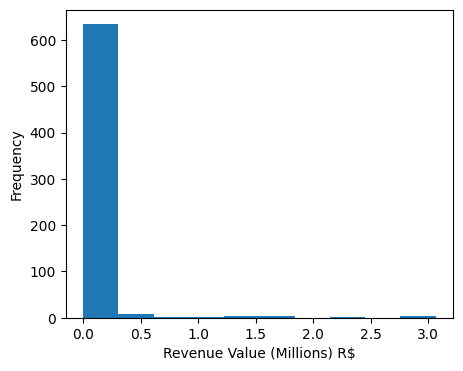

In [4]:
vr_receita = eleicao['VR_RECEITA']
vr_receita.fillna(0, inplace=True)
vr_receita_millions = vr_receita / 1000000

binPop = pd.cut(vr_receita_millions, 10)
binPop.value_counts()

ax = vr_receita_millions.plot.hist(figsize=(5, 4))
ax = ax.set_xlabel('Revenue Value (Millions) R$')

#### Explicação sobre o gráfico

Pelo histograma, podemos notar que a maioria das instâncias se concentra em valores de receita entre 0 e 0.3 milhões de reais, indicando que a maioria dos candidatos possui valores de receita nesse intervalo. Além disso, há poucas observações com valores de receita acima de 1 milhão de reais, pois as frequências nos intervalos acima de 1 milhão são quase 0. Isso sugere uma distribuição assimétrica dos valores de receita, com uma concentração maior de observações em valores menores.

### Boxplot para identificar possíveis outliers

<Axes: >

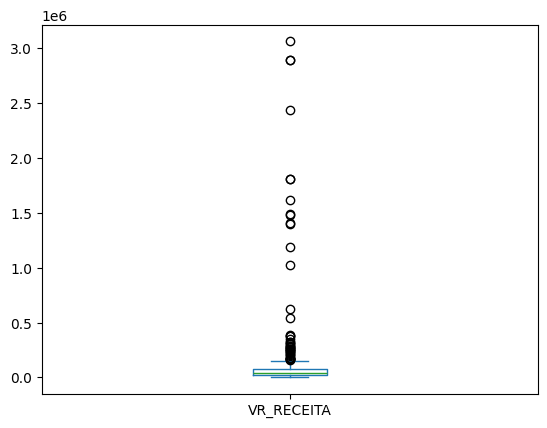

In [6]:
vr_receita.plot.box()

#### Explicação sobre o gráfico de boxplot

O gráfico de boxplot revela que a distribuição dos valores de receita é bastante assimétrica, com a maioria dos candidatos concentrados em faixas mais baixas de receita. Além disso, a presença de outliers, representados pelas bolinhas fora dos limites do boxplot, indica a existência de alguns candidatos com receitas significativamente mais altas em relação à maioria. Esses outliers podem influenciar as medidas de centralidade, como a mediana e a média, tornando-as menos representativas da distribuição geral dos dados.

### Médidas de centralidade valor de receita



In [8]:
print(f"Média = {vr_receita.mean()}")
print(f"Moda = {vr_receita.mode()[0]}")
print(f"Mediana = {vr_receita.median()}")
print(f"Média truncada = {trim_mean(vr_receita, 0.1)}")    

pd.set_option('display.float_format', lambda x: '%.2f' % x)
vr_receita.describe()

Média = 92776.78589312978
Moda = 0.0
Mediana = 41768.0
Média truncada = 46927.82224761905


count       655.00
mean      92776.79
std      279835.76
min           0.00
25%       19736.35
50%       41768.00
75%       74309.75
max     3063700.00
Name: VR_RECEITA, dtype: float64

#### Explicação sobre as médidas de centralidade:

A média, calculada em R$ 92.776,79, é suscetível a ser influenciada por outliers, especialmente quando a amostra apresenta um número significativo desses valores atípicos em relação ao conjunto de dados. É provável que a presença de vários outliers, como indicado pelo boxplot, tenha afetado a média, resultando em um valor relativamente alto.

Por outro lado, a moda é 0.0, o que indica que há uma quantidade considerável de candidatos com receita igual a zero. Embora a moda seja mais robusta em relação a outliers, seu valor pode não fornecer uma representação completa da distribuição dos dados, especialmente quando há uma presença significativa de zeros.

A mediana, que é R$ 41.768,00 , representa o valor central dos dados quando organizados em ordem crescente. Ela é menos afetada por outliers do que a média, o que a torna uma medida de tendência central mais robusta para distribuições assimétricas ou com valores extremos.

A média truncada, calculada em R$ 46.927,82, é uma medida alternativa de tendência central que exclui uma porcentagem específica dos valores extremos, neste caso, os 10% mais extremos. Isso ajuda a reduzir o impacto dos outliers na estimativa da média.

A discrepância significativa entre todas as medidas de centralidade pode ser atribuída à grande variação nos dados, particularmente devido à presença de muitos outliers. Essa variação pode distorcer as estimativas de tendência central e enfatiza a importância de uma análise cuidadosa para interpretar corretamente os dados.

O desvio padrão é uma medida de dispersão que indica o quão distante os valores médios estão da média. O desvio padrão elevado, de R$ 279.835,76, sugere uma grande variabilidade nos dados, com valores dispersos em relação à média. Isso destaca a importância de considerar não apenas a média, mas também a dispersão dos dados ao analisar a distribuição da receita dos candidatos.

Os valores extremos observados também fornecem insights adicionais sobre a distribuição dos dados. O valor mínimo de receita é R$ 0.0 , indicando que há candidatos com receita nula. O primeiro quartil está em R$ 19.736,35, o que significa que 25% dos candidatos têm receita abaixo desse valor. A mediana está em R$ 41.768,00, representando o ponto central dos dados. O terceiro quartil está em R$ 74.309,75, indicando que 75% dos candidatos têm receita abaixo desse valor. O valor máximo de receita é R$ 3.063.700,00, representando um valor muito elevado em relação à maioria dos dados, o que reforça a presença de outliers na distribuição.

In [11]:
# Resetando a configuração de formato de números
pd.reset_option('display.float_format')

### Qual seria o candidato com maior valor arrecadado para sua campanha?

In [12]:
most_collected = vr_receita.max()
eleicao[vr_receita == most_collected]

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO
514,150000774536,2020,PB,PREFEITO,55,BRUNO CUNHA LIMA,PSD,17/11/1990,30,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,EMPRESÁRIO,ELEITO,111526.0,3063700.0,221776.0,3981974.79,BRUNO CUNHA LIMA BRANCO


#### Explicação sobre a candidata com maior valor arrecadado:

O candidato com o maior valor arrecadado para sua campanha foi Bruno Cunha Lima, que concorreu à prefeitura em 2020 pelo PSD. Ele conseguiu arrecadar um total de R$ 3.063.700,00 para financiar sua campanha eleitoral. Bruno Cunha Lima nasceu em 17 de novembro de 1990, tornando-o um dos candidatos mais jovens na corrida eleitoral, com 30 anos na época da eleição. Ele é do sexo masculino, tem educação superior completa e é solteiro. Bruno é classificado como branco e sua ocupação é empresário.

Sua vitória nas eleições o levou ao cargo de prefeito, sendo eleito com um total de 111.526 votos. Além disso, ele tinha um valor significativo de bens declarados no valor de R$ 221.776,00. Isso demonstra uma grande mobilização de recursos financeiros e apoio político em sua campanha.

Uma das propostas de Bruno foi a de oferecer reforço escolar no contraturno na rede municipal de ensino para compensar o ano letivo perdido devido ao novo coronavírus. A declaração aconteceu durante entrevista à rádio CBN Paraíba. Ainda em relação à educação, o candidato falou sobre a pretensão de parcerias público-privadas e afirmou que, se necessário, no pós pandemia, a prefeitura irá comprar vagas em creches particulares para evitar seu fechamento. Informação encontrada no site: https://g1.globo.com/pb/paraiba/noticia/2020/11/15/bruno-cunha-lima-do-psd-e-eleito-prefeito-de-campina-grande.ghtml

### Qual seria o candidato com menor valor arrecadado para sua campanha?

In [14]:
less_collected = vr_receita.min()
eleicao[vr_receita == less_collected]

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO
3,150001201835,2020,PB,PREFEITO,40,IVAN SOUSA,PSB,25/02/1958,62,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,AGRICULTOR,NÃO ELEITO,NaN,0.0,50000.00,123077.42,IVAN LUIS DE SOUSA
64,150000839087,2020,PB,PREFEITO,20,JOSINALDO FERREIRA,PSC,30/03/1979,41,MASCULINO,SUPERIOR INCOMPLETO,SOLTEIRO(A),BRANCA,SERVIDOR PÚBLICO ESTADUAL,NÃO ELEITO,47.0,0.0,100000.00,225948.14,JOSINALDO FRANCISCO FERREIRA
68,150001188993,2020,PB,PREFEITO,90,SOCORRO LIMA,PROS,30/10/1983,37,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO E...,NÃO ELEITO,697.0,0.0,NaN,123077.42,MARIA DO SOCORRO ARAUJO LIMA
74,150000730972,2020,PB,PREFEITO,12,TARCISIO,PDT,11/10/1958,62,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,ADMINISTRADOR,#NULO#,4871.0,0.0,NaN,123077.42,TARCISIO SAULO DE PAIVA
114,150000999386,2020,PB,PREFEITO,25,ALEX MONTEIRO,DEM,12/03/1981,39,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,COMERCIANTE,#NULO#,4471.0,0.0,15000.00,123077.42,ALEX MENDONÇA CAMELO
123,150000802795,2020,PB,PREFEITO,19,EMMANUEL,PODE,10/04/1977,43,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),BRANCA,COMERCIANTE,#NULO#,NaN,0.0,270000.00,123077.42,WILMESON EMMANUEL MENDES SARMENTO
147,150001179897,2020,PB,PREFEITO,43,ZÉ ANTÔNIO,PV,08/05/1963,57,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,NÃO ELEITO,71.0,0.0,115000.00,123077.42,JOSÉ ANTÔNIO DA SILVA
155,150000634548,2020,PB,PREFEITO,25,KAISER ROCHA,DEM,05/11/1974,46,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,ADVOGADO,#NULO#,10830.0,0.0,343900.00,123077.42,KAYSER NOGUEIRA PINTO ROCHA
164,150001065754,2020,PB,PREFEITO,33,EMANUEL,PMN,09/08/1981,39,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,BANCÁRIO E ECONOMIÁRIO,NÃO ELEITO,8.0,0.0,123932.21,238580.64,EMANUEL DE SANTANA MAGLIANO
222,150000795061,2020,PB,PREFEITO,25,BETO DE CHICO,DEM,25/11/1970,50,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),NÃO INFORMADO,OUTROS,#NULO#,2544.0,0.0,630000.00,123077.42,ROBERTO FLORENTINO PESSOA


#### Explicação sobre os menores valores arrecadados para campanhas:

Bom como esperado tiveram candidatos que não possuiam nenhum valor significativo de votos, o que significa que eles não tem valor percentual de votos. Sendo assim todos os candidatos que foram aparesentados tinham 0 votos.

Segue abaixo uma breve descrição de alguns candidatos com os menores valores arrecadados para suas campanhas, todos eles obtiveram 0,00 reais em arrecadação:

- Ivan Sousa (PSB): Nasceu em 25/02/1958, tem 62 anos, é do gênero masculino, possui ensino médio completo, é casado, tem cor parda e ocupa a profissão de agricultor. Ele não foi eleito.

- Josinaldo Ferreira (PSC): Nasceu em 30/03/1979, tem 41 anos, é do gênero masculino, possui ensino superior incompleto, é solteiro, tem cor branca e ocupa a profissão de servidor público estadual. Ele não foi eleito.

- Socorro Lima (PROS): Nasceu em 30/10/1983, tem 37 anos, é do gênero feminino, possui ensino médio completo, é solteira, tem cor branca e ocupa a profissão de técnico de enfermagem e assemelhados. Ela não foi eleita.

### Qual seria dispersão de idade dos candidatos na data da posse:

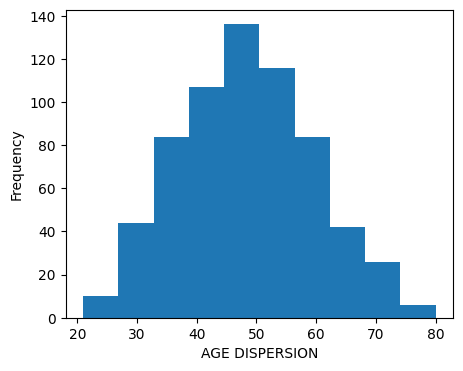

In [7]:
age = eleicao['NR_IDADE_DATA_POSSE']

binPop = pd.cut(age, 10)
binPop.value_counts()

ax = age.plot.hist(figsize=(5, 4))
ax = ax.set_xlabel('AGE DISPERSION')

#### Explicação sobre a dispersão de idades:

A partir da visualização da dispersão de idades, observa-se que a maioria das instâncias concentra-se na faixa etária entre 45 e 53 anos, indicando uma presença significativa de candidatos nessa faixa etária. Além disso, é possível identificar um grupo reduzido de dados que se situam nas faixas etárias extremas, com candidatos de 21 a 28 anos e de 75 a 80 anos. Essa distribuição sugere uma assimetria na dispersão das idades dos candidatos, com uma concentração mais acentuada em faixas etárias intermediárias e uma presença menos frequente nas faixas etárias mais jovens e mais velhas.

### Qual seria o candidato mais novo a ser eleito?


In [8]:
less_age = age.min()
eleicao[age == less_age]

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,...,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO,PERCENTUAL_VOTOS
187,150000932058,2020,PB,PREFEITO,22,MATHEUS GOMES,PL,03/08/1999,21,MASCULINO,...,SOLTEIRO(A),BRANCA,EMPRESÁRIO,NÃO ELEITO,545.0,30350.0,3536.0,123077.42,MATHEUS GOMES DA SILVA,0.016858
388,150000635482,2020,PB,PREFEITO,22,PIERRY,PL,18/10/1999,21,MASCULINO,...,SOLTEIRO(A),BRANCA,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",NÃO ELEITO,1298.0,41320.0,0.0,123077.42,PIERRY ÂNGELO DA SILVA ARAÚJO,0.040151


#### Analisando os dados de menor idade:

Os candidatos mais jovens, Matheus Gomes e Pierry Ângelo da Silva Araújo, ambos com 21 anos na data da posse e filiados ao Partido Liberal (PL), apresentam diferenças notáveis em seus desempenhos eleitorais, financiamento de campanha e ocupações. Embora tenham concorrido com despesas máximas de campanha semelhantes, Matheus declarou uma receita menor e possuía bens pessoais, enquanto Pierry obteve uma receita maior, sem declarar bens. Pierry também conquistou uma parcela significativamente maior de votos em comparação com Matheus. Essas distinções sugerem variações na aceitação dos eleitores e nas estratégias de campanha adotadas pelos candidatos mais jovens, destacando a complexidade dos fatores que influenciam o sucesso político em eleições locais.

### Qual seria o candidato mais velho a ser eleito?




In [9]:
older_age = age.max()
eleicao[age == older_age]

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,...,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,NM_CANDIDATO,PERCENTUAL_VOTOS
633,150000748078,2020,PB,PREFEITO,23,GILBERTO BEZERRA,CIDADANIA,18/12/1940,80,MASCULINO,...,VIÚVO(A),BRANCA,OUTROS,NÃO ELEITO,4648.0,0.0,300000.0,123077.42,GILBERTO BEZERRA DE SOUZA,0.143776


#### Explicação do candidato mais velho:

O candidato mais velho na disputa eleitoral, Gilberto Bezerra de Souza, de 80 anos, apresentou um desempenho eleitoral notável, conquistando 4.648 votos. Sua campanha, embora não tenha declarado receita, foi planejada com uma despesa máxima considerável de R$ 123.077,42, indicando uma estratégia política ativa. Gilberto Bezerra de Souza, viúvo e com ocupação classificada como "Outros", representa uma figura experiente e reconhecida pelos eleitores, evidenciando que sua idade avançada não impediu sua relevância política na disputa eleitoral.

## Análise das relações entre variáveis

#### Analisando a correlação de número de votos e valor de arrecadação para a campanha

In [ ]:
# INSIRA SEU CÓDIGO AQUI
ax = sns.lmplot(data=eleicao, x="VR_RECEITA", y="QT_VOTOS", palette="muted", ci=None) 
ax.set_axis_labels("Receita (Millions | R$)", "Número de Votos")

#### Explicação sobre o gráfico de coorelação (Scatterplot)

In [ ]:
x = eleicao['VR_RECEITA']
y = eleicao['QT_VOTOS']

pd.Series({
    'pearson': x.corr(y, method='pearson'),
    'spearman': x.corr(y, method='spearman'),
    'kendall': x.corr(y, method='kendall')
}, name='correlacao').to_frame()

#### Explicação sobre os coeficientes 

In [ ]:
heatmap_data = eleicao[['VR_RECEITA', 'QT_VOTOS']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#### Analisando o gráfico de heatmap

In [ ]:
ax = sns.lmplot(data=eleicao, x="VR_BEM_CANDIDATO", y="QT_VOTOS", palette="muted", ci=None) 
ax.set_axis_labels("Bens do Candidato (Millions | R$)", "Número de Votos")

#### Explicação sobre o gráfico de correlação entre bens do candidato e número de votos (Scatterplot)

In [ ]:
max_vr_candidato = eleicao['VR_BEM_CANDIDATO'].max()
candidato = eleicao[eleicao['VR_BEM_CANDIDATO'] == max_vr_candidato].reset_index()
candidato

#### Explicação sobre o candidato que tinha 83 milhões de bens avaliados

In [ ]:
x = eleicao['VR_BEM_CANDIDATO']
y = eleicao['QT_VOTOS']

pd.Series({
    'pearson': x.corr(y, method='pearson'),
    'spearman': x.corr(y, method='spearman'),
    'kendall': x.corr(y, method='kendall')
}, name='correlacao').to_frame()

#### Explicação sobre os coeficiente de correlação

In [ ]:
heatmap_data = eleicao[['VR_BEM_CANDIDATO', 'QT_VOTOS']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#### Explicação sobre o gráfico de heatmap

### Fazendo o log da receita para tentar analisar uma possível correlação entre as variáveis

In [ ]:
eleicao['log_receita'] = np.log(eleicao['VR_RECEITA'])
ax = sns.lmplot(data=eleicao, x="log_receita", y="QT_VOTOS", palette="muted", ci=None) 
ax.set_axis_labels("Log da Receita", "Número de Votos")

plt.show()

#### Explicação sobre o uso do log da receita

### Aplicando log em ambas as variáveis

In [ ]:
eleicao['log_receita'] = np.log(eleicao['VR_RECEITA'])
eleicao['log_votos'] = np.log(eleicao['QT_VOTOS'])
ax = sns.lmplot(data=eleicao, x="log_receita", y="log_votos", palette="muted", ci=None) 
ax.set_axis_labels("Log da Receita", "Log dos Votos")

plt.show()

#### Explicando sobre a utilização dos logs em ambas as variáveis (Quantidade de votos e receita de bens declarados)


## Análise de regressão 


### Analisando a relação entre Valor de receita e Quantida de votos

In [ ]:
# INSIRA SEU CÓDIGO AQUI
eleicao['VR_RECEITA'].fillna(0)
eleicao['QT_VOTOS'].fillna(0)


predictors = ['VR_RECEITA']
outcome = 'QT_VOTOS'

model = LinearRegression()
model.fit(eleicao[predictors], eleicao[outcome])
print(f'b0 (intercept): {model.intercept_:.2f}')
print(f'b1 (coefficient): {model.coef_[0]:.2f}')

#### Explicação sobre as variáveis de predição

In [ ]:
fitted = model.predict(eleicao[predictors])
residuals = eleicao[outcome] - fitted

ax = eleicao.plot.scatter(x='VR_RECEITA', y='QT_VOTOS', figsize=(8, 4))
ax.plot(eleicao.VR_RECEITA, fitted)
for x, yactual, yfitted in zip(eleicao.VR_RECEITA, eleicao.QT_VOTOS, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

#### Explicação sobre o gráfico acima.

#### Avaliando o modelo 

In [ ]:
RMSE = np.sqrt(mean_squared_error(eleicao[outcome], fitted))
r2 = r2_score(eleicao[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficiente of determination (r2): {r2:.4f}')

#### Explicação sobre a avaliação do modelo (Valor de receita e a quantidade de votos):

In [ ]:
model = sm.OLS(eleicao[outcome], eleicao[predictors].assign(const=1))
results = model.fit()
results.summary()

#### Explicações adicionais com o uso do results.summary()

#### Analisando com relação ao valor de bens do candidato

In [ ]:
eleicao['VR_BEM_CANDIDATO'].fillna(0)


predictors = ['VR_BEM_CANDIDATO']
outcome = 'QT_VOTOS'

model = LinearRegression()
model.fit(eleicao[predictors], eleicao[outcome])
print(f'b0 (intercept): {model.intercept_:.2f}')
print(f'b1 (coefficient): {model.coef_[0]:.2f}')

#### Explicação sobre as variáveis de predição

In [ ]:
fitted = model.predict(eleicao[predictors])
residuals = eleicao[outcome] - fitted

ax = eleicao.plot.scatter(x='VR_BEM_CANDIDATO', y='QT_VOTOS', figsize=(8, 4))
ax.plot(eleicao.VR_BEM_CANDIDATO, fitted)
for x, yactual, yfitted in zip(eleicao.VR_BEM_CANDIDATO, eleicao.QT_VOTOS, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

#### Explicação sobre o gráfico acima

#### Avaliando o modelo 

In [ ]:
RMSE = np.sqrt(mean_squared_error(eleicao[outcome], fitted))
r2 = r2_score(eleicao[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficiente of determination (r2): {r2:.4f}')

#### Explicação sobre a avaliação do modelo (Valor de bens declarados e a quantidade de votos):

In [ ]:
model = sm.OLS(eleicao[outcome], eleicao[predictors].assign(const=1))
results = model.fit()
results.summary()

#### Explicações adicionais com o uso do results.summary()

### Analise utilizando regressão múltipla

In [ ]:

dummy_siglas = pd.get_dummies(eleicao['SG_PARTIDO'], prefix='SG_PARTIDO', drop_first=True, dtype=int)
dummy_genero = pd.get_dummies(eleicao['DS_GENERO'], prefix='GENERO', drop_first=True, dtype=int)
dummy_cor_raca = pd.get_dummies(eleicao['DS_COR_RACA'], prefix='COR_RACA', drop_first=True, dtype=int)
dummy_grau_instrucao = pd.get_dummies(eleicao['DS_GRAU_INSTRUCAO'], prefix='GRAU_INSTRUCAO', drop_first=True, dtype=int)
dummy_estado_civil = pd.get_dummies(eleicao['DS_ESTADO_CIVIL'], prefix='ESTADO_CIVIL',drop_first=True, dtype=int)

eleicao_com_dummy = pd.concat([eleicao,dummy_cor_raca, dummy_genero, dummy_grau_instrucao, dummy_estado_civil, dummy_siglas], axis=1)
eleicao_com_dummy_sem_nulos = eleicao_com_dummy.fillna(0)

predictors = ['NR_CANDIDATO', 'NR_IDADE_DATA_POSSE', 'COR_RACA_BRANCA', 'COR_RACA_INDÍGENA', 'COR_RACA_PARDA', 'COR_RACA_PRETA', 'GENERO_MASCULINO', 'GRAU_INSTRUCAO_ENSINO FUNDAMENTAL INCOMPLETO', 'GRAU_INSTRUCAO_ENSINO MÉDIO COMPLETO', 'GRAU_INSTRUCAO_ENSINO MÉDIO INCOMPLETO', 'GRAU_INSTRUCAO_LÊ E ESCREVE', 'GRAU_INSTRUCAO_SUPERIOR COMPLETO', 'GRAU_INSTRUCAO_SUPERIOR INCOMPLETO' , 'ESTADO_CIVIL_DIVORCIADO(A)', 'ESTADO_CIVIL_SEPARADO(A) JUDICIALMENTE', 'ESTADO_CIVIL_SOLTEIRO(A)', 'ESTADO_CIVIL_VIÚVO(A)','SG_PARTIDO_DC', 'SG_PARTIDO_MDB', 'SG_PARTIDO_PC do B', 'SG_PARTIDO_PDT', 'SG_PARTIDO_PL', 'SG_PARTIDO_PMB', 'SG_PARTIDO_PP', 'SG_PARTIDO_PROS', 'SG_PARTIDO_PRTB', 'SG_PARTIDO_PSB', 'SG_PARTIDO_PSD', 'SG_PARTIDO_PSDB', 'SG_PARTIDO_PSOL', 'SG_PARTIDO_PT', 'SG_PARTIDO_PTB', 'SG_PARTIDO_PV', 'SG_PARTIDO_REDE', 'SG_PARTIDO_REPUBLICANOS', 'SG_PARTIDO_SOLIDARIEDADE', 'SG_PARTIDO_UNIÃO', 'VR_RECEITA', 'VR_BEM_CANDIDATO']

outcome = 'QT_VOTOS'

model = LinearRegression()
model.fit(eleicao_com_dummy_sem_nulos[predictors], eleicao_com_dummy_sem_nulos[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, model.coef_):
    print(f' {name}: {coef}')
    


#### Explicação sobre os coeficientes:

In [ ]:
fitted = model.predict(eleicao_com_dummy_sem_nulos[predictors])
RMSE = np.sqrt(mean_squared_error(eleicao_com_dummy_sem_nulos[outcome], fitted))
r2 = r2_score(eleicao_com_dummy_sem_nulos[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficiente of determination (r2): {r2:.4f}')

#### Explicação sobre as medidas apresentadas do RMSE e o coeficiente de determinação (R²)

In [ ]:
model = sm.OLS(eleicao_com_dummy_sem_nulos[outcome], eleicao_com_dummy_sem_nulos[predictors].assign(const=1))
results = model.fit()
results.summary()

#### Explicação sobre alguns outros coeficientes mostrados:

In [ ]:
dummy_genero = pd.get_dummies(eleicao['DS_GENERO'], prefix='GENERO', drop_first=True, dtype=int)
dummy_estado_civil = pd.get_dummies(eleicao['DS_ESTADO_CIVIL'], prefix='ESTADO_CIVIL',drop_first=True, dtype=int)

eleicao_com_dummy = pd.concat([eleicao, dummy_genero, dummy_estado_civil], axis=1)
eleicao_com_dummy_sem_nulos = eleicao_com_dummy.fillna(0)

predictors = ['GENERO_MASCULINO', 'ESTADO_CIVIL_SOLTEIRO(A)','VR_RECEITA']

outcome = 'QT_VOTOS'

model = LinearRegression()
model.fit(eleicao_com_dummy_sem_nulos[predictors], eleicao_com_dummy_sem_nulos[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, model.coef_):
    print(f' {name}: {coef}')

In [ ]:
fitted = model.predict(eleicao_com_dummy_sem_nulos[predictors])
RMSE = np.sqrt(mean_squared_error(eleicao_com_dummy_sem_nulos[outcome], fitted))
r2 = r2_score(eleicao_com_dummy_sem_nulos[outcome], fitted)
print(f'Root Mean Square Error (RMSE): {RMSE:.0f}')
print(f'Coefficiente of determination (r2): {r2:.4f}')

In [ ]:
model = sm.OLS(eleicao_com_dummy_sem_nulos[outcome], eleicao_com_dummy_sem_nulos[predictors].assign(const=1))
results = model.fit()
results.summary()


### Exemplos de outras questões que podem ser discutidas

### Quanto um candidato deve arrecadar no mínimo (receita) para ter mais chance de ser eleito?

In [ ]:
candidatos_eleitos = eleicao[eleicao['DS_SIT_TOT_TURNO'].str.startswith('ELEITO')]
candidatos_eleitos = candidatos_eleitos.fillna(0)
media_receita = candidatos_eleitos['VR_RECEITA'].mean()
minimo_receita = candidatos_eleitos['VR_RECEITA'].min()
print("Valor médio da receita para candidatos eleitos: R$ {:.2f}".format(media_receita))
print("O valor minimo da receita para o candidato ser eleito é : R$ {:.2f}".format(minimo_receita))


#### Explicação sobre o que foi levantado:

#### Considere um candidato fictício que arrecadou 100 mil reais de receita na campanha. Qual a previsão de votos que ele deve receber? É provável que ele seja eleito?

In [ ]:
eleicao_copy = eleicao.copy()
eleicao_copy['VR_RECEITA'] = eleicao['VR_RECEITA'].fillna(0)
eleicao_copy['QT_VOTOS'] = eleicao['QT_VOTOS'].fillna(0)
predictors = ['VR_RECEITA']
outcome = 'QT_VOTOS'
model = LinearRegression()
model.fit(eleicao_copy[predictors], eleicao_copy[outcome])
orcamento_campanha = 100000
previsao_votos = model.predict([[orcamento_campanha]])
print(f"Número esperado de votos para um orçamento de R$ {orcamento_campanha:.2f} de campanha: {previsao_votos[0]:.2f} votos.")



#### Explicando o resultado da predição:

#### Considere um candidato fictício que o candidato tinha 100 mil em valor de bens. Qual a previsão de votos que ele deve receber? É provável que ele seja eleito?

In [ ]:
eleicao_copy = eleicao.copy()
eleicao_copy['VR_BEM_CANDIDATO'] = eleicao['VR_BEM_CANDIDATO'].fillna(0)
eleicao_copy['QT_VOTOS'] = eleicao['QT_VOTOS'].fillna(0)
predictors = ['VR_BEM_CANDIDATO']
outcome = 'QT_VOTOS'
model = LinearRegression()
model.fit(eleicao_copy[predictors], eleicao_copy[outcome])
valor_bem_candidato = 100000
previsao_votos = model.predict([[valor_bem_candidato]])
print(f"Número esperado de votos para um valor de bens do candidato de R$ {valor_bem_candidato:.2f} de campanha: {previsao_votos[0]:.2f} votos.")


#### Explicando o resultado da predição:

### É possível estimar bem se um candidato vai ser eleito ou não com base em outras variáveis (ex: regressão logística com a situação final do candidato)?

In [ ]:
from sklearn.linear_model import LogisticRegression

eleicao_copy = eleicao.copy()
categorias_interesse = ['ELEITO POR MÉDIA', 'NÃO ELEITO']
eleicao_copy = eleicao_copy[eleicao_copy['DS_SIT_TOT_TURNO'].isin(categorias_interesse)]

limites = [0, 5000, 10000, 15000, 20000, 25000, 30000, 50000, 100000, np.inf]
categorias = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-50000', '50000-100000', '100000+']


eleicao_copy['DS_SIT_TOT_TURNO'] = eleicao_copy['DS_SIT_TOT_TURNO'].astype('category')
eleicao_copy['DS_SIT_TOT_TURNO'] = eleicao_copy['DS_SIT_TOT_TURNO'].cat.reorder_categories(['ELEITO POR MÉDIA', 'NÃO ELEITO'])
eleicao_copy['DS_GENERO'] = eleicao_copy['DS_GENERO'].astype('category')
eleicao_copy['DS_ESTADO_CIVIL'] = eleicao_copy['DS_ESTADO_CIVIL'].astype('category')
eleicao_copy['DS_COR_RACA'] = eleicao_copy['DS_COR_RACA'].astype('category')
eleicao_copy['VR_RECEITA'] = pd.cut(eleicao_copy['VR_RECEITA'], bins=limites, labels=categorias, right=False).astype('category')

outcome = 'DS_SIT_TOT_TURNO'
predictors  = ['DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'VR_RECEITA']
eleicao_copy[[outcome] + predictors]

X = pd.get_dummies(eleicao_copy[predictors], prefix='', prefix_sep='', 
                   drop_first=True)
y = eleicao_copy[outcome] 

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X.columns)


#### Explicação sobre a regressão Logística em relação aos dados apresentados: (o valor negativo tende a ser para primeira classe)

### Realizando a avaliação do modelo utilizando uma nova coluna que vai verificar se os candidatos foram eleitos ou não, caso seja eleito vai ficar 1 e caso não seja vai ficar 0.

In [ ]:
from sklearn.linear_model import LogisticRegression

eleicao_copy = eleicao.copy()
eleicao_copy['ELEITO'] = eleicao_copy['DS_SIT_TOT_TURNO'].apply(lambda x: 1 if x in ['ELEITO POR MÉDIA', 'ELEITO POR QP'] else 0)

limites = [0, 5000, 10000, 15000, 20000, 25000, 30000, 50000, 100000, np.inf]
categorias = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-50000', '50000-100000', '100000+']

eleicao_copy['ELEITO'] = eleicao_copy['ELEITO'].astype('category')
eleicao_copy.sort_values(by='ELEITO', ascending=False, inplace=True)
eleicao_copy['DS_GENERO'] = eleicao_copy['DS_GENERO'].astype('category')
eleicao_copy['DS_ESTADO_CIVIL'] = eleicao_copy['DS_ESTADO_CIVIL'].astype('category')
eleicao_copy['DS_COR_RACA'] = eleicao_copy['DS_COR_RACA'].astype('category')
eleicao_copy['VR_RECEITA'] = pd.cut(eleicao_copy['VR_RECEITA'], bins=limites, labels=categorias, right=False).astype('category')


outcome = 'ELEITO'
predictors  = ['DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'VR_RECEITA']
eleicao_copy[[outcome] + predictors]

X = pd.get_dummies(eleicao_copy[predictors], prefix='', prefix_sep='', 
                   drop_first=True)
y = eleicao_copy[outcome] 

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X.columns)

#### Explicação sobre o que foi levantado: